# EPA1333 - Computer Engineering for Scientific Computing
## Week 7 - Oct 20, 2016

**Python for Data Analysis**

*Wes McKinney*


In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

## Links

  * [Pandas Exercises](https://github.com/guipsamora/pandas_exercises)
  * [100 pandas puzzles (well incomplete...)](https://github.com/ajcr/100-pandas-puzzles)
  
  * [Walkthrough exercises from PandasTutorial by Wes McKinney](https://github.com/lemonbalm/pandas-exercises)
  Note: you need to convert these to Python3 first.
  * [A few common Excel tasks in Pandas](http://pbpython.com/excel-pandas-comp.html)
  
  * Some more Tutorials:
    * https://apawlik.github.io/2014-04-09-GARNET/lessons/garnet/pandas/tutorial.html
    * http://efavdb.com/pandas-tips-and-tricks/


# Pandas exercises

## Exercise 3: MovieLens Ratings



### Import data

You can find MovieLens ratings [here](http://grouplens.org/datasets/movielens/).


  1. Download the file [ml-1m.zip](http://files.grouplens.org/datasets/movielens/ml-1m.zip) with 1 million ratings by 6000 users on 4000 movies. 
  2. Unzip the file. This will give you 4 files (README and 3 data files).
  3. Read the README and browse through the data files to understand the structure of the data.
  

#### Q1: Read the 3 dat files into three separate DataFrames. Name the dataframes and name the columns appropriately.

In [47]:
# Q1: your code here
movies = pd.read_csv('ml-1m/movies.dat', delimiter="::", engine='python',header=None,names=['MovieID','Title','Genre'])
users = pd.read_csv('ml-1m/users.dat', delimiter="::", engine='python',header=None,names=['UserID','Gender','Age','Occupation','Zip_code'])
ratings = pd.read_csv('ml-1m/ratings.dat', delimiter="::", engine='python',header=None,names=['UserID','MovieID','Rating','Timestamp'])

In [48]:
movies.head(1)

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy


In [49]:
users.head(1)

,UserID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067


In [50]:
ratings.head(1)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760


#### Q2:  How many users are there? And how many are men and how many are women?

In [62]:
# Q2: your code here
print('there are %.f users in the database' %len(users.UserID.unique()))
print('there are %.f female users in the database ' %len(users.UserID [users.Gender == 'F']))
print('there are %.f male users in the database ' %len(users.UserID [users.Gender == 'M']))


there are 6040 users in the database
there are 1709 female users in the database 
there are 4331 male users in the database 


#### Q3: How many ratings are there? How many were made by man and how many by women? Express it in percentages.

In [126]:
# Q3: your code here
print('There are in total %.f ratings in this database' %len(ratings))
userratings = ratings.merge(users, left_on='UserID', right_on='UserID')
print('in total %.f ratings are made by female' %len(userratings [userratings.Gender == 'F']))
print('in total %.f ratings are made by male' %len(userratings [userratings.Gender == 'M']))


There are in total 1000209 ratings in this database
in total 246440 ratings are made by female
in total 753769 ratings are made by male


#### Q4: What is the average rating given? What is the average rating given by men and by women separately? Does one gender rate higher on average?


In [99]:
# Q4: your code here
print('The average rating given is',userratings.Rating.mean())
print('The average rating given by male is',userratings [userratings.Gender == 'M'].Rating.mean())
print('The average rating given by female is',userratings [userratings.Gender == 'F'].Rating.mean())

The average rating given is 3.581564453029317
The average rating given by male is 3.5688785290984373
The average rating given by female is 3.6203660120110372


#### Q5: Plot histograms of the ratings given by men and women in 2 plots, side-by-side.

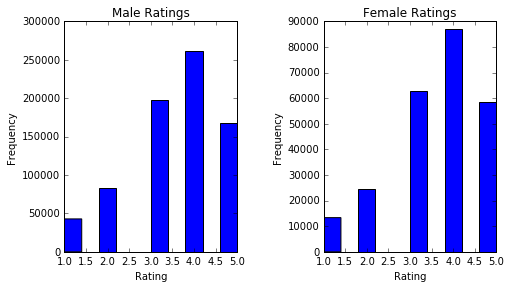

In [146]:
# Q5: your code here
femaleratings = userratings [userratings.Gender == 'F']
maleratings = userratings [userratings.Gender == 'M']
#average rating per male user
#maleratings.groupby('UserID').Rating.mean()
plt.subplot(1,2,1)
plt.hist(maleratings.Rating, align='mid')
plt.title('Male Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(femaleratings.Rating, align='mid')
plt.title('Female Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')


plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=0.8, bottom=0.0, hspace=0.0, wspace=0.5)

## DateTime

Pandas support dates with its own data type.

```python
pandas.datetime
```
   
   or
   
```python
pandas.Timestamp
```
   
   
Both represents year, month, day, hours, seconds, milliseconds and are more or less interchangeable.

You can create such a datetime/Timstamp object from a timestamp string using:

    date = pd.datetime.from_timestamp( timestamp )
    
A more generic timestamp creator is:

    date = pd.to_datetime( timestamp or (series of timestamps), unit="xxx" ) 
    
This function will recognize different notations of time (not just timestamps). However,
you may need to indicate what type it is using the "unit" keyword.


#### Q6: Add an extra column to the ratings table containing a 'real date' (year, month, day, hours, seconds) instead of a string timestamp. Try it with ```pd.datetime.fromtimestamp``` as well as ```pd.to_datetime```. Do you notice any difference?

*Hint*: If you want to apply a function to an entire column, you can use the function ```apply```:

For example:

    dataframe['ColumnName'].apply( np.sqrt )  # NOTE np.sqrt, not np.sqrt(). 
                                              # We pass the function itself, not calling it!

will apply the function ```np.sqrt``` to each value in the column "ColumnName" of the dataframe and return the result. Note: ```np.sqrt``` is special in that it can also be called as:
    
    np.sqrt( dataframe(['ColumnName'] )
    


In [160]:
# Q6: your code here
ratings.Realtime = ratings.Timestamp.apply(pd.datetime.fromtimestamp)

In [163]:
ratings ['Realtime'] = ratings.Realtime

In [171]:
pd.to_datetime(ratings.Timestamp,unit='s')

0         2000-12-31 22:12:40
1         2000-12-31 22:35:09
2         2000-12-31 22:32:48
3         2000-12-31 22:04:35
4         2001-01-06 23:38:11
5         2000-12-31 22:37:48
6         2000-12-31 22:33:59
7         2000-12-31 22:11:59
8         2000-12-31 22:37:48
9         2000-12-31 22:22:48
10        2001-01-06 23:37:48
11        2000-12-31 22:29:12
12        2000-12-31 22:38:01
13        2000-12-31 22:35:24
14        2000-12-31 22:29:13
15        2000-12-31 22:36:28
16        2001-01-06 23:37:48
17        2000-12-31 22:29:37
18        2000-12-31 22:28:33
19        2000-12-31 22:33:59
20        2000-12-31 22:36:45
21        2000-12-31 22:12:40
22        2000-12-31 22:00:55
23        2001-01-06 23:36:35
24        2000-12-31 22:01:43
25        2001-01-06 23:39:11
26        2000-12-31 22:32:33
27        2000-12-31 22:00:55
28        2001-01-06 23:35:39
29        2001-01-06 23:37:48
                  ...        
1000179   2000-04-25 23:16:24
1000180   2000-04-26 02:17:35
1000181   

#### Q7: Give an overview of the ratings given per year.

*Hint*: Datetime and Timestamp data types allow access to their individual members (year, month, day, hour, minute, seconds.

For example:
  
    ts = pd.Timestamp("2016-10-16")
    ts.year -> 2016
    ts.day -> 16
    
In a dataframe you can access these datetime/Timestamp methods by using

    dataframe['Columnname'].dt.year
    
 

In [249]:
ratings.groupby(ratings['Realtime'].dt.year).size()

Realtime
2000    904721
2001     68094
2002     24046
2003      3348
dtype: int64

In [203]:
# Q7: your code here
test = ratings[['Rating','Realtime']]

In [211]:
test = test.set_index('Realtime')

In [250]:
test.resample('AS').size()

Realtime
2000-01-01    904721
2001-01-01     68094
2002-01-01     24046
2003-01-01      3348
Freq: AS-JAN, dtype: int64

#### Q8: How many genres are there? (Count them from the tables, verify with what you find in the README)

In [285]:
#Q8: your code here
genre_combis = movies.Genre.unique()
genres = set()
for x in genre_combis:
    y = x.split(sep='|')
    for z in y:
        genres.add(z)
print('The dataset has %.f different genres: %s' %(len(genres), str(genres)))


The dataset has 18 different genres: {'Horror', 'Thriller', 'Fantasy', 'Action', 'Romance', 'Film-Noir', 'Comedy', "Children's", 'Drama', 'War', 'Sci-Fi', 'Crime', 'Adventure', 'Documentary', 'Animation', 'Musical', 'Western', 'Mystery'}


#### Q9: Count how many movies there are in each genre category.

In [341]:
# Q9: your code here
#movies['Horror'] = 
for genre in genres:
    movies[genre] = [genre in movie_genres.split("|") for movie_genres in movies.Genre] 

In [343]:
movies.head()

,MovieID,Title,Genre,Horror,Genrelist,Thriller,Fantasy,Action,Romance,Film-Noir,...,Drama,War,Sci-Fi,Crime,Adventure,Documentary,Animation,Musical,Western,Mystery
0,1,Toy Story (1995),Animation|Children's|Comedy,False,"[Animation, Children's, Comedy]",False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2,Jumanji (1995),Adventure|Children's|Fantasy,False,"[Adventure, Children's, Fantasy]",False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,"[Comedy, Romance]",False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama,False,"[Comedy, Drama]",False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,[Comedy],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [350]:
movies.iloc[:,5:].sum()

Thriller        492
Fantasy          68
Action          503
Romance         471
Film-Noir        44
Comedy         1200
Children's      251
Drama          1603
War             143
Sci-Fi          276
Crime           211
Adventure       283
Documentary     127
Animation       105
Musical         114
Western          68
Mystery         106
dtype: int64

In [2]:
# Now use sum() to count the values per genre


#### Q10: How many ratings did the movie 'Casino (1995)' receive? What was the average rating for this movie?

In [357]:
# Q10: your code here
casinoID = int(movies [movies.Title == 'Casino (1995)']['MovieID'])

In [368]:
print(ratings [ratings.MovieID == casinoID ].shape[0])

print(ratings [ratings.MovieID == casinoID ].Rating.mean())



682
3.7932551319648096


#### Q11: What was the average rating of men for this movie? What was the average of women for this movie?

In [371]:
# Q11: your code here
print(femaleratings [femaleratings.MovieID == casinoID ].shape[0])

print(femaleratings [femaleratings.MovieID == casinoID ].Rating.mean())

print(maleratings [maleratings.MovieID == casinoID ].shape[0])

print(maleratings [maleratings.MovieID == casinoID ].Rating.mean())


133
3.6090225563909772
549
3.8378870673952643
